In [1]:
# Deutsch's Algorithm
%matplotlib inline
from qiskit import *

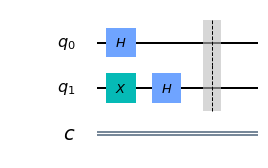

In [2]:
# Step 0: prepare the superposition
prep_circuit = QuantumCircuit(2, 1)
prep_circuit.x(1)
prep_circuit.h([0, 1])
prep_circuit.barrier()
prep_circuit.draw(output="mpl")

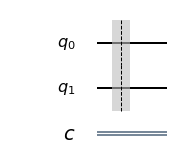

In [3]:
# Step 1: send input to blackbox. There are four possible black boxes
# f0: f(0) = 0 and f(1) = 0, f is constant
f0_circuit = QuantumCircuit(2, 1)
f0_circuit.barrier()
f0_circuit.draw(output="mpl")

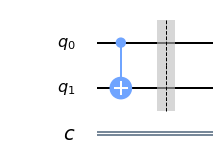

In [5]:
# f1: f(0) = 0 and f(1) = 1, f is balanced
f1_circuit = QuantumCircuit(2, 1)
f1_circuit.cx(0, 1)  # the second bit only becomes 1 when input is 1, hence CNOT gate
f1_circuit.barrier()
f1_circuit.draw(output="mpl")

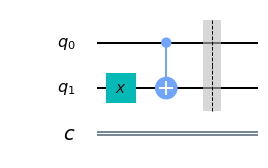

In [6]:
# f2: f(0) = 1 and f(1) = 0, f is balanced
f2_circuit = QuantumCircuit(2, 1)
f2_circuit.x(1)
f2_circuit.cx(0, 1)  # the second bit only becomes 1 when input is 0, hence NOT with CNOT gate
f2_circuit.barrier()
f2_circuit.draw(output="mpl")

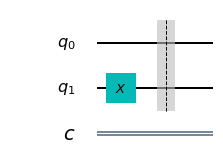

In [7]:
# f3: f(0) = 1 and f(1) = 1, f is constant
f3_circuit = QuantumCircuit(2, 1)
f3_circuit.x(1)  # f is 1 regardless
f3_circuit.barrier()
f3_circuit.draw(output="mpl")

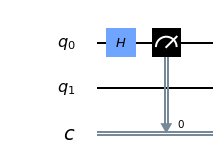

In [8]:
# Step 2: apply Hadamard and measure it
measure_circuit = QuantumCircuit(2, 1)
measure_circuit.h(0)
measure_circuit.measure(0, 0)
measure_circuit.draw(output="mpl")

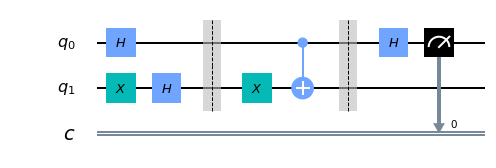

In [9]:
# An example of what the assembled circuit looks like
(prep_circuit + f2_circuit + measure_circuit).draw(output="mpl")

In [10]:
# Now we simulate for each function, to do so we create an auxiliary function that runs it
def simulate_circuit(prep, blackbox, measuring):
    """Returns the counts of the circuit that is combination of the three circuits"""
    circuit = prep + blackbox + measuring
    simulator = Aer.get_backend("qasm_simulator")
    job = execute(circuit, simulator, shots = 2**16)
    result = job.result()
    count = result.get_counts()
    return count

In [11]:
# Recall that the measurement is 0 if f is balanced, and 1 if f is constant

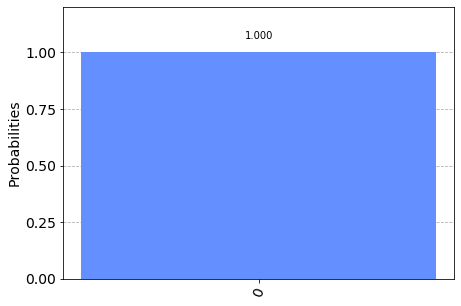

In [14]:
# For f0, we expect only 0s in measurement because it is constant
count_f0 = simulate_circuit(prep_circuit, f0_circuit, measure_circuit)
visualization.plot_histogram(count_f0)

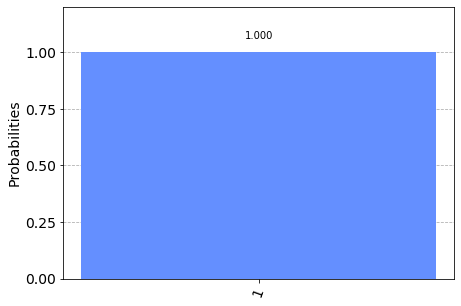

In [15]:
# For f1, we expect only 1s in measurement because it is balanced
count_f1 = simulate_circuit(prep_circuit, f1_circuit, measure_circuit)
visualization.plot_histogram(count_f1)

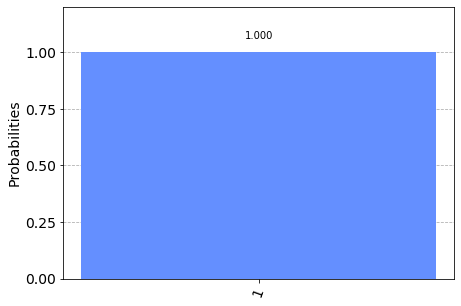

In [16]:
# For f2, we expect only 1s in measurement because it is balanced
count_f2 = simulate_circuit(prep_circuit, f2_circuit, measure_circuit)
visualization.plot_histogram(count_f2)

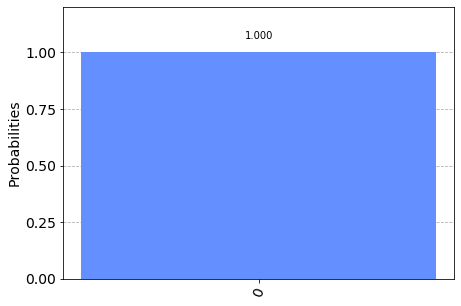

In [17]:
# For f3, we expect only 0s in measurement because it is constant
count_f3 = simulate_circuit(prep_circuit, f3_circuit, measure_circuit)
visualization.plot_histogram(count_f3)

In [18]:
# The results match our predictions!
# For purposes of reproducibility, the Qiskit version is
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}